In [17]:
import numpy as np

def rosenbrock(x):
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

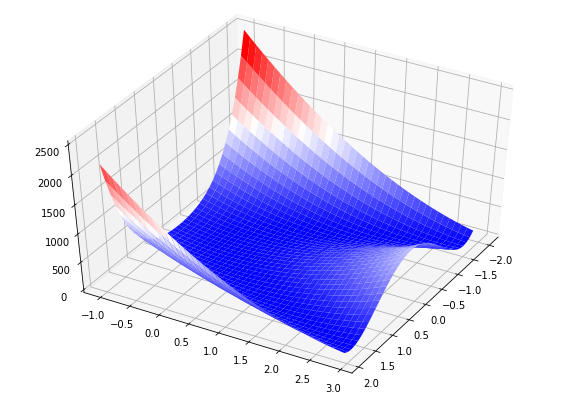

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()

In [3]:
from scipy.optimize import minimize

In [4]:
x0=np.array([1.2,0.7,2.1])

In [7]:
res = minimize(rosenbrock, x0, method='nelder-mead',options={'xtol':1e-8,'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 137
         Function evaluations: 246


In [9]:
def rosen_der (x):
    xm = x [1: -1]
    xm_m1 = x [: - 2]
    xm_p1 = x [2:]
    der = np.zeros_like (x)
    der [1: -1] = 200 * (xm-xm_m1 ** 2) - 400 * (xm_p1 - xm ** 2) * xm - 2 * (1-xm)
    der [0] = -400 * x [0] * (x [1] -x [0] ** 2) - 2 * (1-x [0])
    der [-1] = 200 * (x [-1] -x [-2] ** 2)
    return der

In [10]:
rosen_der(np.array([0,0]))

array([-2,  0])

In [12]:
res = minimize(rosenbrock, x0, method='BFGS',jac=rosen_der, options={'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 58
         Gradient evaluations: 58


In [13]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [15]:
res = minimize(rosenbrock, x0, method='Newton-CG',jac=rosen_der,hess=rosen_hess, options={'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 56
         Gradient evaluations: 89
         Hessian evaluations: 34


In [16]:
56+89+34

179

In [18]:
from scipy.optimize import differential_evolution

In [30]:
bounds = [(-10,10),(-10,10),(-10,10),(-10,10)]

In [35]:
result = differential_evolution(rosenbrock, bounds,seed=21,tol=0.1,recombination=0.3)
result

     fun: 9.171963151142325e-11
     jac: array([-1.76673707e-04, -3.60215039e-05, -1.78397869e-04,  1.19609048e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 60075
     nit: 1000
 success: False
       x: array([0.9999986 , 0.99999764, 0.99999559, 0.99999178])